# Import and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(5860, 57)

In [4]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df.shape

(5827, 57)

# Linear Regression Prediction of Player Efficiency Rating

In [5]:
X = df[['WS/48', 'BPM', 'USG%']]
y = df['PER'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5827, 3) (5827, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

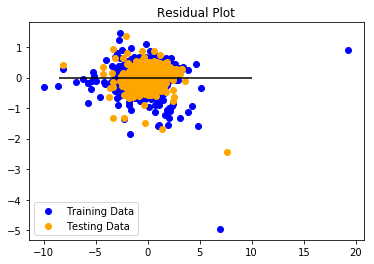

In [10]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("PER_residuals")
plt.show()

In [11]:
coefficients = model.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = X
print(dict(zip(features, coefficients)))

{'WS/48': '0.82', 'BPM': '0.08', 'USG%': '0.36'}


In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06239664666880236, R2: 0.9286585611993972


In [13]:
score = model.score(X_test_scaled, y_test_scaled)
score = "%.3f" % score
score

'0.929'

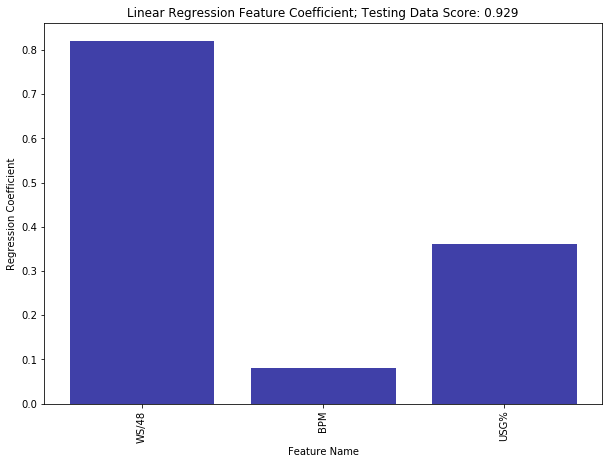

In [14]:
x_values = np.arange(len(features.columns))
plt.figure(figsize=(10, 7))

plt.title("Linear Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=features.columns)
plt.xticks(rotation='vertical')
plt.savefig("PER_Regression_Features")
plt.show()

# Linear Regression Prediction of Minutes Played

In [15]:
X = df[['GS', 'G', 'PTS']]
y = df['MP'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5827, 3) (5827, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

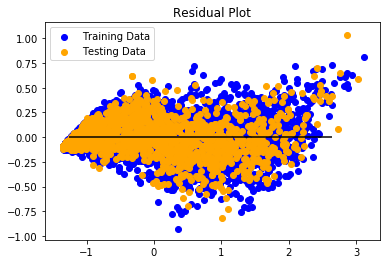

In [20]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("MP_residuals")
plt.show()

In [21]:
coefficients = model.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = X
print(dict(zip(features, coefficients)))

{'GS': '0.27', 'G': '0.39', 'PTS': '0.43'}


In [22]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03458932187394327, R2: 0.9649413971201148


In [23]:
score = model.score(X_test_scaled, y_test_scaled)
score = "%.3f" % score
score

'0.965'

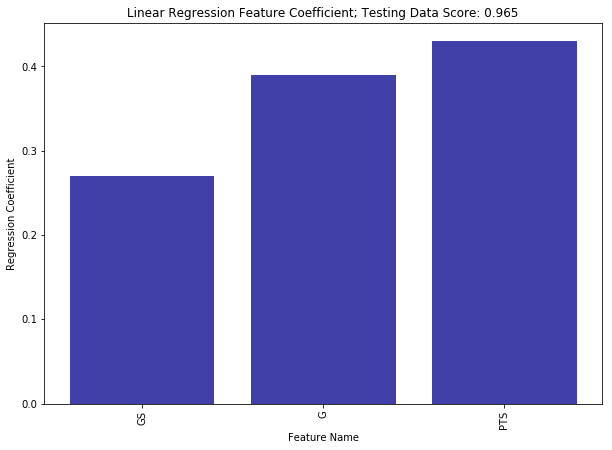

In [24]:
x_values = np.arange(len(features.columns))
plt.figure(figsize=(10, 7))

plt.title("Linear Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=features.columns)
plt.xticks(rotation='vertical')
plt.savefig("MP_Regression_Features")
plt.show()

# Logistic Regression and Decision Tree/Random Forest of Player Making it Past Rookie Season

In [25]:
df = pd.read_csv('cleaned_data.csv')
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
noExp_df = df.loc[(df['YrsExperience'] == 0) & (df['Year'] != 2016)]
noExp_df

Year              Player    Pos  Age   Tm   G  GS    MP   PER    TS%  \
1     2007        Hassan Adams     SG   22  NJN  61   8   495  13.0  0.577   
2     2007        Maurice Ager     SG   22  DAL  32   1   214   2.9  0.408   
3     2007   LaMarcus Aldridge      C   21  POR  63  22  1392  17.1  0.533   
8     2007        Lou Amundson     PF   24  TOT  11   0    89   9.6  0.412   
10    2007        Lou Amundson     PF   24  PHI  10   0    87   9.8  0.412   
18    2007    Hilton Armstrong      C   22  NOK  56   5   634  12.2  0.570   
21    2007     James Augustine     PF   22  ORL   2   0     7  16.6  0.333   
22    2007    Kelenna Azubuike     SG   23  GSW  41   9   669  13.4  0.572   
23    2007     Renaldo Balkman     SF   22  NYK  68   1  1064  16.1  0.531   
26    2007          J.J. Barea     PG   22  DAL  33   1   191   9.6  0.440   
27    2007     Andrea Bargnani     PF   21  TOR  65   2  1629  12.8  0.546   
42    2007         Steve Blake     PG   26  TOT  82  42  2225   9.9  0.491   
45    2007        Will Blalock     PG   23  DET  14   0   166   4.5  0.383   
51    2007          Josh Boone     PF   22  NJN  61   0   669  14.6  0.587   
56    2007        Earl Boykins     PG   30  TOT  66  23  2031  16.2  0.548   
59    2007      Cedric Bozeman     SG   23  ATL  23   5   199  -0.1  0.312   
61    2007       Ronnie Brewer     SG   21  UTA  56  14   675  15.2  0.566   
63    2007         Andre Brown     PF   25  SEA  38   0   271  11.1  0.577   
64    2007           Dee Brown     PG   22  UTA  49   0   450   8.6  0.411   
68    2007       Shannon Brown     SG   21  CLE  23   5   202   7.5  0.455   
79    2007       Rodney Carney     SF   22  PHI  67  35  1169  11.4  0.514   
91    2007       Mardy Collins     SF   22  NYK  52   9   777   9.2  0.445   
93    2007         Will Conroy  PG-SG   24  TOT   7   0    52   1.1  0.000   
95    2007         Will Conroy     PG   24  LAC   4   0    35  -0.4  0.000   
106   2007          Paul Davis      C   22  LAC  31   0   180  11.2  0.452   
111   2007    Yakhouba Diawara     SG   24  DEN  64  19  1177   5.3  0.450   
114   2007           Ike Diogu     PF   23  TOT  59   2   760  14.9  0.559   
118   2007          Juan Dixon     SG   28  TOT  81   6  1926  11.8  0.516   
123   2007        Quincy Douby     PG   22  SAC  42   0   359   9.0  0.449   
126   2007       Mike Dunleavy  SG-PF   26  TOT  82  49  2580  14.1  0.542   
...    ...                 ...    ...  ...  ...  ..  ..   ...   ...    ...   
5168  2015        Marcus Smart     PG   20  BOS  67  38  1808  11.0  0.491   
5170  2015           Ish Smith     PG   26  TOT  55  14   832  12.3  0.431   
5173  2015          J.R. Smith     SG   29  TOT  70  51  2080  13.6  0.538   
5177  2015          Josh Smith     PF   29  TOT  83  35  2300  14.9  0.467   
5180  2015          Russ Smith     PG   23  TOT  12   0    65   5.2  0.488   
5181  2015          Russ Smith     PG   23  NOP   6   0    29 -16.6  0.250   
5182  2015          Russ Smith     PG   23  MEM   6   0    36  22.7  0.603   
5186  2015        Nik Stauskas     SG   21  SAC  73   1  1127   7.5  0.492   
5189  2015      David Stockton     PG   23  SAC   3   0    33  10.8  0.463   
5190  2015      Jarnell Stokes     PF   21  MEM  19   2   126  18.6  0.578   
5191  2015   Amar'e Stoudemire     PF   32  TOT  59  15  1245  20.3  0.595   
5202  2015       Isaiah Thomas     PG   25  TOT  67   1  1726  20.6  0.579   
5205  2015        Lance Thomas  PF-SF   26  TOT  62  37  1490   8.0  0.456   
5214  2015     Marcus Thornton     SG   27  TOT  48   0   721  15.0  0.514   
5217  2015    Anthony Tolliver     PF   29  TOT  76  11  1432  11.1  0.569   
5230  2015         Noah Vonleh     PF   19  CHO  25   0   259  13.2  0.475   
5233  2015        Dion Waiters     SG   23  TOT  80  23  2208  10.9  0.460   
5240  2015         T.J. Warren     SF   21  PHO  40   1   614  14.0  0.551   
5242  2015          David Wear     PF   24  SAC   2   0     7   2.4  0.000   
5243  2015         Travis We

In [26]:
noExp = noExp_df['Player']

In [27]:
oneExp_df = df.loc[(df['YrsExperience'] == 1) & (df['Year'] != 2007)]
oneExp_df

Year               Player Pos  Age   Tm   G  GS    MP   PER    TS%  \
519   2008         Maurice Ager  SG   23  DAL  12   3    77  -4.4  0.253   
520   2008         Maurice Ager  SG   23  NJN  14   0    88   7.1  0.443   
522   2008    LaMarcus Aldridge  PF   22  POR  76  76  2649  18.5  0.523   
541   2008     Hilton Armstrong   C   23  NOH  65   3   732   7.7  0.498   
544   2008      James Augustine  PF   23  ORL  25   0   149  10.8  0.533   
545   2008     Kelenna Azubuike  SG   24  GSW  81  17  1732  13.5  0.534   
546   2008      Renaldo Balkman  SF   23  NYK  65   0   952  11.5  0.492   
552   2008      Andrea Bargnani  PF   22  TOR  78  53  1861  10.6  0.495   
574   2008           Josh Boone  PF   23  NJN  70  53  1773  14.8  0.543   
583   2008        Ronnie Brewer  SG   22  UTA  76  76  2088  18.4  0.612   
589   2008          Andre Brown  PF   26  MEM  33   1   286  13.5  0.502   
596   2008        Shannon Brown  SG   22  CLE  15   4   218   8.1  0.433   
597   2008        Shannon Brown  SG   22  CHI   6   0    22 -11.8  0.255   
606   2008        Rodney Carney  SF   23  PHI  70   6  1039  12.1  0.478   
620   2008        Mardy Collins  SG   23  NYK  46   8   634   5.9  0.378   
640   2008           Paul Davis  PF   23  LAC  22   1   194   9.0  0.389   
645   2008     Yakhouba Diawara  SG   25  DEN  54  14   542   8.1  0.518   
659   2008         Quincy Douby  PG   23  SAC  74   0   876   9.7  0.495   
677   2008        Jordan Farmar  PG   21  LAL  82   0  1690  15.4  0.563   
687   2008           Randy Foye  PG   24  MIN  39  31  1259  12.7  0.520   
693   2008      Jorge Garbajosa  PF   30  TOR   7   0    74  10.4  0.440   
701   2008             Rudy Gay  SF   21  MEM  81  81  3000  17.4  0.546   
702   2008     Mickael Gelabale  SG   24  SEA  39   0   465  10.5  0.509   
704   2008        Daniel Gibson  PG   21  CLE  58  26  1765  11.7  0.592   
756   2008      Walter Herrmann  PF   28  CHA  17   0   174  12.1  0.490   
757   2008      Walter Herrmann  PF   28  DET  28   0   199  14.0  0.496   
761   2008         Ryan Hollins  PF   23  CHA  60   1   532  11.4  0.565   
800   2008    Alexander Johnson  PF   24  MIA  43   6   549   8.9  0.554   
811   2008          Bobby Jones   C   24  DEN  25   0   222   8.5  0.550   
812   2008          Bobby Jones  SF   24  MEM   9   2   137  12.1  0.495   
...    ...                  ...  ..  ...  ...  ..  ..   ...   ...    ...   
5526  2016          Rodney Hood  SG   23  UTA  79  79  2541  14.1  0.542   
5541  2016           Joe Ingles  SF   28  UTA  81   2  1241  10.3  0.572   
5567  2016        Tyler Johnson  SG   23  MIA  36   5   863  13.8  0.579   
5592  2016    Joffrey Lauvergne   C   24  DEN  59  15  1041  15.7  0.567   
5593  2016          Zach LaVine  SG   20  MIN  82  33  2294  14.3  0.548   
5637  2016       K.J. McDaniels  SF   22  HOU  37   1   235  10.6  0.522   
5638  2016       Doug McDermott  SF   24  CHI  81   4  1861  10.9  0.561   
5639  2016         Mitch McGary  PF   23  OKC  20   0    72   7.4  0.474   
5656  2016       Elijah Millsap  SG   28  UTA  20   0   173   6.5  0.384   
5658  2016       Nikola Mirotic  PF   24  CHI  66  38  1646  15.6  0.564   
5663  2016        Eric Moreland  PF   24  SAC   8   0    48   7.4  0.515   
5676  2016       Shabazz Napier  PG   24  ORL  55   0   600   9.6  0.460   
5682  2016         Nerlens Noel   C   21  PHI  67  62  1965  16.2  0.544   
5683  2016       Lucas Nogueira   C   23  TOR  29   1   225  15.6  0.642   
5690  2016      Johnny O'Bryant  PF   22  MIL  66   4   857   7.4  0.441   
5697  2016  Kostas Papanikolaou  SF   25  DEN  26   6   294   6.0  0.464   
5698  2016        Jabari Parker  PF   20  MIL  76  72  2408  14.8  0.535   
5704  2016        Adreian Payne  PF   24  MIN  52   2   486   5.6  0.422   
5706  2016        Elfrid Payton  PG   21  ORL  73  69  2145  13.9  0.478   
5716  2016        Dwight Powell  PF   24  DAL  69   2   992  16.8  0.557   
5724  2016        Julius Randle  PF   21  LAL  81  60 

In [28]:
oneExp = oneExp_df['Player']

In [29]:
playersNone = []
for player in noExp:
    playersNone.append(player)

In [30]:
playersOne = []
for player in oneExp:
    playersOne.append(player)

In [31]:
twoYrs = []
for player in playersNone:
    if player in playersOne:
        value = 1
        twoYrs.append(value)
    else:
        value = 0
        twoYrs.append(value)

In [32]:
len(twoYrs)

1285

In [33]:
noExp_df['atLeast2Years'] = twoYrs

/Users/owen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
noExp_df.head(20)

Year             Player Pos  Age   Tm   G  GS    MP   PER    TS%  \
1   2007       Hassan Adams  SG   22  NJN  61   8   495  13.0  0.577   
2   2007       Maurice Ager  SG   22  DAL  32   1   214   2.9  0.408   
3   2007  LaMarcus Aldridge   C   21  POR  63  22  1392  17.1  0.533   
8   2007       Lou Amundson  PF   24  TOT  11   0    89   9.6  0.412   
10  2007       Lou Amundson  PF   24  PHI  10   0    87   9.8  0.412   
18  2007   Hilton Armstrong   C   22  NOK  56   5   634  12.2  0.570   
21  2007    James Augustine  PF   22  ORL   2   0     7  16.6  0.333   
22  2007   Kelenna Azubuike  SG   23  GSW  41   9   669  13.4  0.572   
23  2007    Renaldo Balkman  SF   22  NYK  68   1  1064  16.1  0.531   
26  2007         J.J. Barea  PG   22  DAL  33   1   191   9.6  0.440   
27  2007    Andrea Bargnani  PF   21  TOR  65   2  1629  12.8  0.546   
42  2007        Steve Blake  PG   26  TOT  82  42  2225   9.9  0.491   
45  2007       Will Blalock  PG   23  DET  14   0   166   4.5  0.383   
51  2007         Josh Boone  PF   22  NJN  61   0   669  14.6  0.587   
56  2007       Earl Boykins  PG   30  TOT  66  23  2031  16.2  0.548   
59  2007     Cedric Bozeman  SG   23  ATL  23   5   199  -0.1  0.312   
61  2007      Ronnie Brewer  SG   21  UTA  56  14   675  15.2  0.566   
63  2007        Andre Brown  PF   25  SEA  38   0   271  11.1  0.577   
64  2007          Dee Brown  PG   22  UTA  49   0   450   8.6  0.411   
68  2007      Shannon Brown  SG   21  CLE  23   5   202   7.5  0.455   

        ...        BLK  TOV   PF  PTS  TrueSalary  YrsExperience  Height  \
1       ...          4   22   47  174           0            0.0    76.0   
2       ...          3   15   27   69           0            0.0    77.0   
3       ...         73   43  186  565     1900000            0.0    83.0   
8       ...          8    5   15   16           0            0.0     0.0   
10      ...          8    5   15   16           0            0.0     0.0   
18      ...         26   35   79  176      700000            0.0    83.0   
21      ...          0    0    2    2           0            0.0    82.0   
22      ...         10   39   49  291      700000            0.0    77.0   
23      ...         44   49  146  334     3100000            0.0    80.0   
26      ...          1   14   19   78           0            0.0     0.0   
27      ...         53  107  180  751     2400000            0.0    84.0   
42      ...          8  129  121  528           0            0.0     0.0   
45      ...          0   12    9   25           0            0.0    72.0   
51      ...         21   33   94  254           0            0.0    82.0   
56      ...          2  120   92  961           0            0.0     0.0   
59      ...          2    9   32   26           0            0.0    78.0   
61      ...          6   24   44  260     1500000            0.0    79.0   
63      ...          4   29   26   93           0            0.0    81.0   
64      ...          7   31   51   94      900000            0.0    72.0   
68      ...          3   14   24   73           0            0.0    76.0   

    Weight  RoundedPosition  atLeast2Years  
1    220.0              2.0              1  
2    202.0              2.0              1  
3    240.0              5.0              1  
8      0.0              0.0              0  
10     0.0              0.0              0  
18   235.0              5.0              1  
21   235.0              4.0              1  
22   220.0              2.0              1  
23   208.0              4.0              1  
26     0.0              0.0              0  
27   225.0              4.0              1  
42     0.0              0.0              0  
45   205.0              1.0              0  
51   237.0              4.0              1  
56     0.0              0.0              0  
59   207.0              2.0              0  
61   220.0              3.0              1  
63   245.0              4.0              1  
64   185.0              1.0            

In [35]:
noExp_df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'atLeast2Years'],
      dtype='object')

In [36]:
noExp_df = noExp_df.drop("blanl", axis=1)
noExp_df = noExp_df.drop("blank2", axis=1)
noExp_df = noExp_df.dropna(axis=0, how='any')
noExp_df = noExp_df.reset_index(drop=True) #RESET INDEX
data = noExp_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("atLeast2Years", axis=1)
feature_names = data.columns
target = noExp_df['atLeast2Years']
data.head()

G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%   ...    TRB  \
0  61   8   495  13.0  0.577  0.007  0.267   8.4   9.9   9.2   ...     77   
1  32   1   214   2.9  0.408  0.214  0.471   0.6  11.0   5.9   ...     21   
2  63  22  1392  17.1  0.533  0.004  0.240  12.6  15.3  13.9   ...    312   
3  41   9   669  13.4  0.572  0.359  0.355   4.2  11.4   7.7   ...     94   
4  68   1  1064  16.1  0.531  0.098  0.327  11.0  21.8  16.4   ...    294   

   AST  STL  BLK  TOV   PF  PTS  YrsExperience  Height  Weight  
0   13   17    4   22   47  174            0.0    76.0   220.0  
1    7    4    3   15   27   69            0.0    77.0   202.0  
2   24   22   73   43  186  565            0.0    83.0   240.0  
3   28   22   10   39   49  291            0.0    77.0   220.0  
4   44   57   44   49  146  334            0.0    80.0   208.0  

[5 rows x 48 columns]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [38]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [39]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
coefficients = classifier.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = data.columns.tolist()
print(dict(zip(features, coefficients)))

{'G': '0.96', 'GS': '-0.27', 'MP': '0.04', 'PER': '-0.04', 'TS%': '0.09', '3PAr': '-0.42', 'FTr': '-0.34', 'ORB%': '-0.14', 'DRB%': '0.13', 'TRB%': '-0.06', 'AST%': '-0.06', 'STL%': '0.03', 'BLK%': '-0.04', 'TOV%': '0.03', 'USG%': '0.19', 'OWS': '0.48', 'DWS': '-0.93', 'WS': '-0.67', 'WS/48': '0.73', 'OBPM': '-0.16', 'DBPM': '-0.05', 'BPM': '0.08', 'VORP': '0.01', 'FG': '-0.10', 'FGA': '0.02', 'FG%': '-0.33', '3P': '-0.85', '3PA': '0.81', '3P%': '0.08', '2P': '0.17', '2PA': '-0.33', '2P%': '0.33', 'eFG%': '-0.17', 'FT': '0.04', 'FTA': '-0.06', 'FT%': '-0.17', 'ORB': '-0.00', 'DRB': '0.33', 'TRB': '0.23', 'AST': '-0.85', 'STL': '0.62', 'BLK': '0.02', 'TOV': '1.03', 'PF': '-0.72', 'PTS': '-0.15', 'YrsExperience': '0.00', 'Height': '0.68', 'Weight': '0.22'}


In [43]:
score = classifier.score(X_test_scaled, y_test)
score = "%.3f" % score
score

'0.683'

In [44]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.6825396825396826


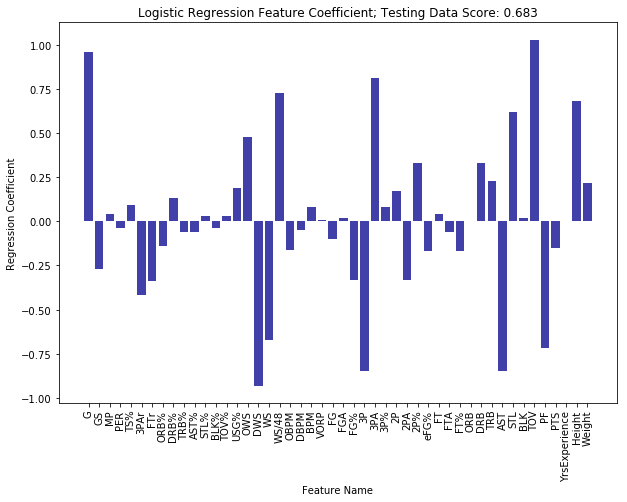

In [45]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Logistic Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Rookie_Success_Regression_Features")
plt.show()

In [46]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
840       0           1
844       1           0
573       0           1
252       1           0
873       1           0
604       1           0
270       1           0
803       1           0
773       0           1
843       0           1
728       0           1
402       1           0
394       1           0
289       0           1
839       1           0
68        0           1
553       1           0
269       0           1
274       0           1
589       0           1
617       0           1
742       1           0
28        0           1
813       0           1
331       1           0
172       0           1
356       1           0
211       0           1
543       1           0
326       0           1
..      ...         ...
114       0           1
893       0           1
9         0           1
689       0           1
651       1           0
110       0           1
430       1           0
771       1           0
919       0           1
243       1           0
536       0           1
808       0           1
874       1           0
478       1           0
618       1           0
624       0           1
748       1           0
494       1           0
86        0           1
436       1           0
147       0           1
55        0           1
983       1           0
541       0           1
855       0           1
217       0           1
884       1           0
263       0           1
858       0           1
479       1           0

[80 rows x 2 columns]

In [47]:
predictions.shape

(252,)

In [48]:
from sklearn import tree

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [50]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.67460317460317465

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.69841269841269837

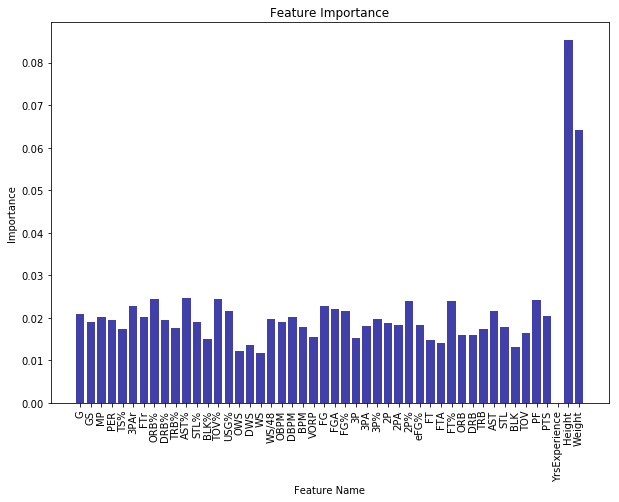

In [52]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Rookie_Success_Features")
plt.show()

In [53]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.085212435177736051, 'Height'),
 (0.064176587031558027, 'Weight'),
 (0.024543945317567775, 'AST%'),
 (0.024472613311309246, 'ORB%'),
 (0.024392280493794473, 'TOV%'),
 (0.024220380331397236, 'PF'),
 (0.024051746141809095, 'FT%'),
 (0.023983712571032999, '2P%'),
 (0.022832534987401332, '3PAr'),
 (0.022761412832632756, 'FG'),
 (0.021997653572638873, 'FGA'),
 (0.021658847980237803, 'FG%'),
 (0.021632286871032521, 'USG%'),
 (0.021557549411788442, 'AST'),
 (0.020961663493573333, 'G'),
 (0.020413161896220333, 'PTS'),
 (0.020252317706331003, 'DBPM'),
 (0.020170406420369172, 'FTr'),
 (0.020068523967755259, 'MP'),
 (0.019759960905793829, '3P%'),
 (0.01960794873222118, 'WS/48'),
 (0.019459855635908064, 'PER'),
 (0.019404137262379342, 'DRB%'),
 (0.019055747839114359, 'OBPM'),
 (0.018977643435870557, 'STL%'),
 (0.018897856120564851, 'GS'),
 (0.018793774214848586, '2P'),
 (0.018384476449298356, '2PA'),
 (0.01831259160277628, 'eFG%'),
 (0.017986841727145729, '3PA'),
 (0.017868837195715349, 'BPM'),

# K Nearest Neighbors Player Position

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
#df['Pos'].value_counts()

In [56]:
df = df.reset_index(drop=True)

In [57]:
#df.index[df['Pos'] == 'C-SF'].tolist()

In [58]:
df = df.drop(df.index[[df.index[df['Pos'] == 'C-SF'].tolist()]])

In [59]:
df = df.reset_index(drop=True)

In [60]:
#df.index[df['Pos'] == 'C-SF'].tolist()

In [61]:
#df['Pos'].value_counts()

In [62]:
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')

In [63]:
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
feature_names = data.columns
target = df['Pos']
target_names = target.value_counts().keys().tolist()
data.head()

G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%   ...    TRB  \
0  80  45  2015  13.1  0.524  0.031  0.358   7.0  16.4  11.6   ...    398   
1  61   8   495  13.0  0.577  0.007  0.267   8.4   9.9   9.2   ...     77   
2  32   1   214   2.9  0.408  0.214  0.471   0.6  11.0   5.9   ...     21   
3  63  22  1392  17.1  0.533  0.004  0.240  12.6  15.3  13.9   ...    312   
4  60   1   638  10.4  0.443  0.004  0.132   7.6  13.7  10.6   ...    119   

   AST  STL  BLK  TOV   PF  PTS  YrsExperience  Height  Weight  
0  109   53   40  116  243  793           10.0    81.0   225.0  
1   13   17    4   22   47  174            0.0    76.0   220.0  
2    7    4    3   15   27   69            0.0    77.0   202.0  
3   24   22   73   43  186  565            0.0    83.0   240.0  
4   16   17   16   21   85  242            5.0    82.0   255.0  

[5 rows x 48 columns]

In [64]:
#data.shape

In [65]:
#target.shape

In [66]:
#data.keys()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.552
k: 3, Train/Test Score: 0.758/0.554
k: 5, Train/Test Score: 0.719/0.571
k: 7, Train/Test Score: 0.688/0.575
k: 9, Train/Test Score: 0.668/0.586
k: 11, Train/Test Score: 0.654/0.579
k: 13, Train/Test Score: 0.652/0.578
k: 15, Train/Test Score: 0.648/0.578
k: 17, Train/Test Score: 0.643/0.573
k: 19, Train/Test Score: 0.634/0.579
k: 21, Train/Test Score: 0.629/0.587
k: 23, Train/Test Score: 0.624/0.578
k: 25, Train/Test Score: 0.633/0.572
k: 27, Train/Test Score: 0.626/0.560
k: 29, Train/Test Score: 0.623/0.550
k: 31, Train/Test Score: 0.616/0.566
k: 33, Train/Test Score: 0.616/0.569
k: 35, Train/Test Score: 0.616/0.565
k: 37, Train/Test Score: 0.615/0.561
k: 39, Train/Test Score: 0.609/0.567
k: 41, Train/Test Score: 0.609/0.554
k: 43, Train/Test Score: 0.608/0.563
k: 45, Train/Test Score: 0.607/0.559
k: 47, Train/Test Score: 0.600/0.557
k: 49, Train/Test Score: 0.604/0.562
k: 51, Train/Test Score: 0.594/0.558
k: 53, Train/Test Score: 0.592/0.562
k: 55,

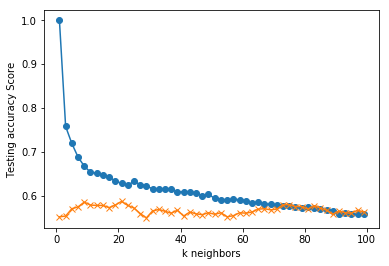

In [68]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("KNN_Pos")
plt.show()

In [69]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.578


# Stratified KNN Player Position

In [70]:
#target.value_counts()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [72]:
#X_train.values.reshape(-1,1)

In [73]:
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [74]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.549
k: 3, Train/Test Score: 0.761/0.551
k: 5, Train/Test Score: 0.723/0.552
k: 7, Train/Test Score: 0.696/0.577
k: 9, Train/Test Score: 0.674/0.572
k: 11, Train/Test Score: 0.665/0.578
k: 13, Train/Test Score: 0.658/0.557
k: 15, Train/Test Score: 0.654/0.564
k: 17, Train/Test Score: 0.645/0.569
k: 19, Train/Test Score: 0.645/0.567
k: 21, Train/Test Score: 0.634/0.574
k: 23, Train/Test Score: 0.634/0.582
k: 25, Train/Test Score: 0.628/0.577
k: 27, Train/Test Score: 0.623/0.567
k: 29, Train/Test Score: 0.624/0.572
k: 31, Train/Test Score: 0.619/0.575
k: 33, Train/Test Score: 0.616/0.573
k: 35, Train/Test Score: 0.612/0.570
k: 37, Train/Test Score: 0.607/0.567
k: 39, Train/Test Score: 0.604/0.564
k: 41, Train/Test Score: 0.607/0.560
k: 43, Train/Test Score: 0.603/0.562
k: 45, Train/Test Score: 0.600/0.566
k: 47, Train/Test Score: 0.602/0.563
k: 49, Train/Test Score: 0.598/0.560
k: 51, Train/Test Score: 0.594/0.569
k: 53, Train/Test Score: 0.595/0.556
k: 55,

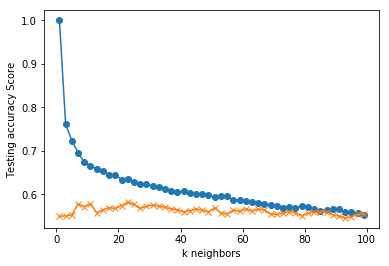

In [75]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Strat_KNN_Pos")
plt.show()

In [76]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=23 Test Acc: 0.582


# Random Forests Player Position

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(data, target)
rf.score(data, target)

1.0

In [79]:
importances = rf.feature_importances_
importances

array([ 0.00972569,  0.00981639,  0.01002868,  0.01250505,  0.01199212,
        0.03225562,  0.01411112,  0.0417456 ,  0.04204259,  0.06905423,
        0.08318321,  0.01511462,  0.02828981,  0.02996305,  0.01675584,
        0.00899753,  0.00821   ,  0.00857349,  0.01132593,  0.01130638,
        0.01490999,  0.01137749,  0.00866791,  0.01006112,  0.01046691,
        0.01418825,  0.01580805,  0.01798663,  0.0148169 ,  0.0101859 ,
        0.01062621,  0.01239728,  0.01144729,  0.01060164,  0.01077328,
        0.01468811,  0.01724834,  0.01300562,  0.0137827 ,  0.02303653,
        0.01159943,  0.01941378,  0.0117546 ,  0.01249262,  0.01090938,
        0.01041956,  0.11345698,  0.0688805 ])

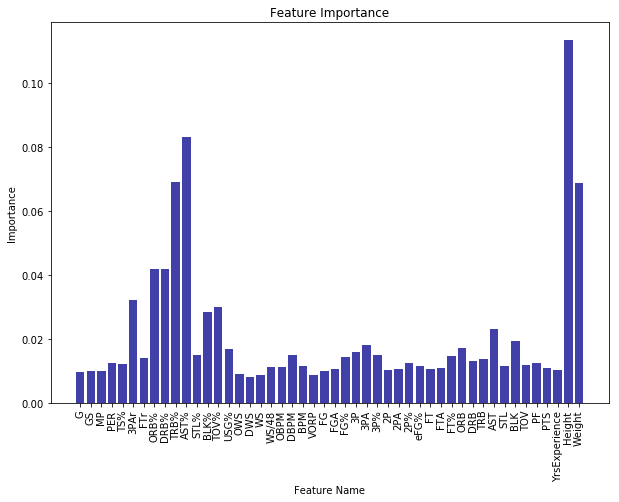

In [80]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
#plt.savefig("Pos_Features")
plt.show()

In [81]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11345698347821226, 'Height'),
 (0.083183211036655796, 'AST%'),
 (0.069054234190081248, 'TRB%'),
 (0.068880503154885253, 'Weight'),
 (0.042042592592197073, 'DRB%'),
 (0.041745602185730209, 'ORB%'),
 (0.032255623187632816, '3PAr'),
 (0.029963050761622579, 'TOV%'),
 (0.028289807798072938, 'BLK%'),
 (0.023036534006173254, 'AST'),
 (0.019413784040691152, 'BLK'),
 (0.017986626779240053, '3PA'),
 (0.017248344010827574, 'ORB'),
 (0.016755839701900262, 'USG%'),
 (0.015808052802408316, '3P'),
 (0.015114621648323915, 'STL%'),
 (0.014909991521691099, 'DBPM'),
 (0.014816902599315881, '3P%'),
 (0.014688112109519929, 'FT%'),
 (0.014188245638658168, 'FG%'),
 (0.014111117381751368, 'FTr'),
 (0.013782698098489596, 'TRB'),
 (0.01300561922294579, 'DRB'),
 (0.012505047611811619, 'PER'),
 (0.012492617319961477, 'PF'),
 (0.012397277084124693, '2P%'),
 (0.01199211583755158, 'TS%'),
 (0.011754599514051021, 'TOV'),
 (0.011599430930420557, 'STL'),
 (0.011447294076910466, 'eFG%'),
 (0.011377494410904094, 'BPM

# Decision Tree and Random Forests Player Position

In [82]:
from sklearn import tree

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [84]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.63598326359832635

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.75983263598326356

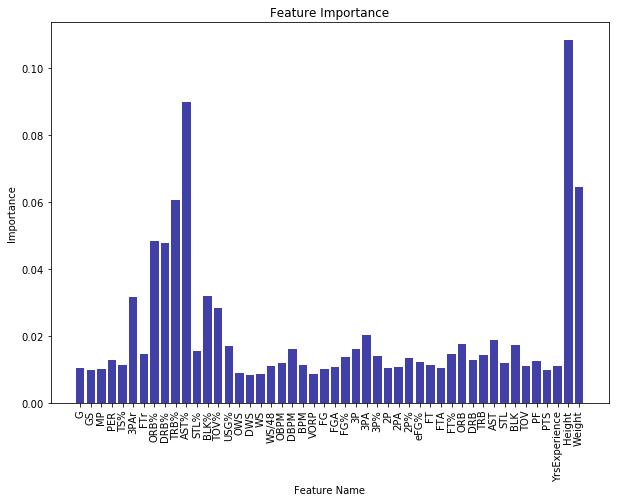

In [86]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Pos_Features")
plt.show()

In [87]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10813000746061809, 'Height'),
 (0.089783870415223122, 'AST%'),
 (0.064321150364379673, 'Weight'),
 (0.060415214585199079, 'TRB%'),
 (0.048174010611862342, 'ORB%'),
 (0.047550429620172391, 'DRB%'),
 (0.03178482521845049, 'BLK%'),
 (0.031536909860460274, '3PAr'),
 (0.028390149182693024, 'TOV%'),
 (0.020337492496545283, '3PA'),
 (0.018647969152177101, 'AST'),
 (0.017497327316738739, 'ORB'),
 (0.017277448984557974, 'BLK'),
 (0.016955212193249011, 'USG%'),
 (0.016110959853047609, 'DBPM'),
 (0.015971960209971044, '3P'),
 (0.015534675048625766, 'STL%'),
 (0.014616907248648163, 'FTr'),
 (0.014464605160417896, 'FT%'),
 (0.014252961237898855, 'TRB'),
 (0.013912615881895725, '3P%'),
 (0.013646495303039565, 'FG%'),
 (0.013443298464364659, '2P%'),
 (0.012888280372309017, 'DRB'),
 (0.01270314067131554, 'PER'),
 (0.012554145889704242, 'PF'),
 (0.012030028172096757, 'eFG%'),
 (0.011959211782226468, 'STL'),
 (0.011781323443583498, 'OBPM'),
 (0.011414915007980248, 'BPM'),
 (0.011346352946603657, 'FT

# Team Classification

In [88]:
df = pd.read_csv('cleaned_data.csv')
df.shape

(5860, 57)

In [89]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df.shape

(5827, 57)

In [90]:
df = df.reset_index(drop=True)

In [91]:
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')

In [92]:
df.shape

(4780, 55)

In [93]:
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
#data = data.drop("RoundedPosition", axis=1)
#data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
feature_names = data.columns
target = df['Tm']
target_names = target.value_counts().keys().tolist()
data.head()

Year   G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%       ...         \
0  2007  80  45  2015  13.1  0.524  0.031  0.358   7.0  16.4       ...          
1  2007  61   8   495  13.0  0.577  0.007  0.267   8.4   9.9       ...          
2  2007  32   1   214   2.9  0.408  0.214  0.471   0.6  11.0       ...          
3  2007  63  22  1392  17.1  0.533  0.004  0.240  12.6  15.3       ...          
4  2007  60   1   638  10.4  0.443  0.004  0.132   7.6  13.7       ...          

   AST  STL  BLK  TOV   PF  PTS  YrsExperience  Height  Weight  \
0  109   53   40  116  243  793           10.0    81.0   225.0   
1   13   17    4   22   47  174            0.0    76.0   220.0   
2    7    4    3   15   27   69            0.0    77.0   202.0   
3   24   22   73   43  186  565            0.0    83.0   240.0   
4   16   17   16   21   85  242            5.0    82.0   255.0   

   RoundedPosition  
0              4.0  
1              2.0  
2              2.0  
3              5.0  
4              4.0  

[5 rows x 50 columns]

In [94]:
data.shape

(4780, 50)

In [95]:
target.shape

(4780,)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [97]:
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [98]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.160
k: 3, Train/Test Score: 0.447/0.151
k: 5, Train/Test Score: 0.365/0.156
k: 7, Train/Test Score: 0.332/0.159
k: 9, Train/Test Score: 0.317/0.156
k: 11, Train/Test Score: 0.303/0.157
k: 13, Train/Test Score: 0.282/0.154
k: 15, Train/Test Score: 0.267/0.158
k: 17, Train/Test Score: 0.259/0.149
k: 19, Train/Test Score: 0.249/0.150
k: 21, Train/Test Score: 0.245/0.147
k: 23, Train/Test Score: 0.243/0.147
k: 25, Train/Test Score: 0.238/0.145
k: 27, Train/Test Score: 0.231/0.144
k: 29, Train/Test Score: 0.227/0.146
k: 31, Train/Test Score: 0.225/0.146
k: 33, Train/Test Score: 0.221/0.148
k: 35, Train/Test Score: 0.218/0.149
k: 37, Train/Test Score: 0.213/0.151
k: 39, Train/Test Score: 0.208/0.150
k: 41, Train/Test Score: 0.205/0.150
k: 43, Train/Test Score: 0.203/0.154
k: 45, Train/Test Score: 0.207/0.158
k: 47, Train/Test Score: 0.203/0.156
k: 49, Train/Test Score: 0.207/0.149
k: 51, Train/Test Score: 0.205/0.148
k: 53, Train/Test Score: 0.201/0.147
k: 55,

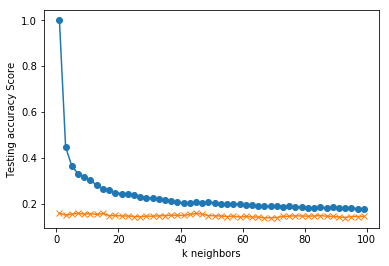

In [99]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Strat_KNN_Tm")
plt.show()

In [100]:
from sklearn import tree

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [102]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.17154811715481172

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.28284518828451882

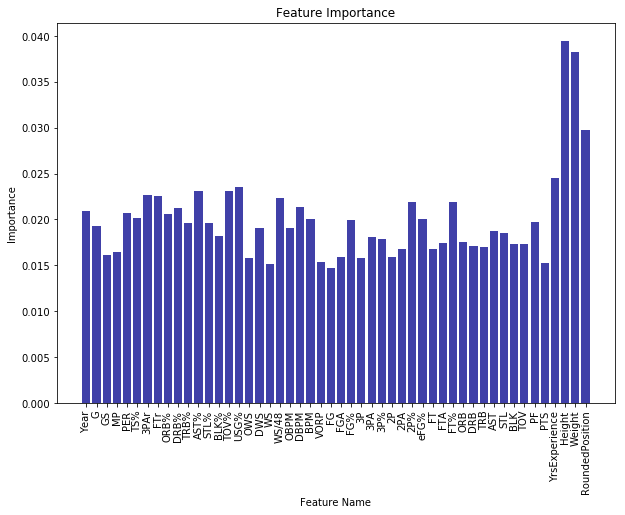

In [104]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Tm_Features")
plt.show()

In [105]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.039479405959006238, 'Height'),
 (0.038222063862172771, 'Weight'),
 (0.029764074327012235, 'RoundedPosition'),
 (0.024555174111328633, 'YrsExperience'),
 (0.023556987343314038, 'USG%'),
 (0.023147289785292582, 'AST%'),
 (0.023073857354666029, 'TOV%'),
 (0.022711975269995962, '3PAr'),
 (0.022572641569496687, 'FTr'),
 (0.022318114228859778, 'WS/48'),
 (0.021908045757937526, 'FT%'),
 (0.021855914664745728, '2P%'),
 (0.021352954858333249, 'DBPM'),
 (0.021198350099529879, 'DRB%'),
 (0.020895654090721714, 'Year'),
 (0.020679399415457541, 'PER'),
 (0.020644450026264395, 'ORB%'),
 (0.020199576351254828, 'TS%'),
 (0.020053734624420061, 'BPM'),
 (0.020011787389382342, 'eFG%'),
 (0.019937404428905993, 'FG%'),
 (0.019760994599804065, 'PF'),
 (0.01963518097131426, 'STL%'),
 (0.01961833522354418, 'TRB%'),
 (0.01931770464332204, 'G'),
 (0.019105250114852645, 'DWS'),
 (0.019019827181571893, 'OBPM'),
 (0.01874495026778623, 'AST'),
 (0.018509314967340023, 'STL'),
 (0.018218539990951833, 'BLK%'),
 (0.

# Combining With DPOY Data

In [106]:
season_stats = pd.read_csv('cleaned_data.csv')

In [107]:
season_stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition'],
      dtype='object')

In [108]:
dpoy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Joakim Noah')]
dpoy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Marc Gasol')]
dpoy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Tyson Chandler')]
dpoy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Garnett')]
dpoy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Marcus Camby')]

dpoys = [dpoy_2007, dpoy_2008, dpoy_2009, dpoy_2010, dpoy_2011, dpoy_2012, dpoy_2013, dpoy_2014, dpoy_2015, dpoy_2016]

dpoys_df = pd.concat(dpoys)
dpoys_df

Year          Player Pos  Age   Tm   G  GS    MP   PER    TS%  \
77    2007    Marcus Camby   C   32  DEN  70  70  2369  19.1  0.519   
696   2008   Kevin Garnett  PF   31  BOS  71  71  2328  25.3  0.588   
1360  2009   Dwight Howard   C   23  ORL  79  79  2821  25.4  0.600   
1938  2010   Dwight Howard   C   24  ORL  82  82  2843  24.0  0.630   
2565  2011   Dwight Howard   C   25  ORL  78  78  2935  26.1  0.616   
2987  2012  Tyson Chandler   C   29  NYK  62  62  2061  18.7  0.708   
3623  2013      Marc Gasol   C   28  MEM  80  80  2796  19.5  0.559   
4442  2014     Joakim Noah   C   28  CHI  80  80  2820  20.0  0.531   
4978  2015   Kawhi Leonard  SF   23  SAS  64  64  2033  22.0  0.567   
5604  2016   Kawhi Leonard  SF   24  SAS  72  72  2380  26.0  0.616   

           ...         STL  BLK  TOV   PF   PTS  TrueSalary  YrsExperience  \
77         ...          87  231  122  183   785    19300000           10.0   
696        ...         100   89  138  163  1337    24200000           12.0   
1360       ...          77  231  240  270  1624    19800000            4.0   
1938       ...          75  228  274  287  1503    21900000            5.0   
2565       ...         107  186  279  258  1784    20900000            6.0   
2987       ...          56   89  102  186   699    17100000           10.0   
3623       ...          80  139  157  255  1127    22100000            4.0   
4442       ...          99  121  194  245  1007    22400000            6.0   
4978       ...         148   48   97  128  1057    21600000            3.0   
5604       ...         128   71  105  133  1523    11300000            4.0   

      Height  Weight  RoundedPosition  
77      83.0   220.0              5.0  
696     83.0   220.0              4.0  
1360    83.0   240.0              5.0  
1938    83.0   240.0              5.0  
2565    83.0   240.0              5.0  
2987    85.0   235.0              5.0  
3623    85.0   265.0              5.0  
4442    83.0   232.0              4.0  
4978    79.0   230.0              3.0  
5604    79.0   230.0              3.0  

[10 rows x 57 columns]

In [109]:
df = season_stats
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition'],
      dtype='object')

In [110]:
dpoys_index = dpoys_df.index.values.tolist()
dpoys_index

[77, 696, 1360, 1938, 2565, 2987, 3623, 4442, 4978, 5604]

In [111]:
dpoy = []
for i in range(0, len(df)):
    if i in dpoys_index:
        value = 1
        dpoy.append(value)
    else:
        value = 0
        dpoy.append(value)
            

In [112]:
len(dpoy)

5860

In [113]:
sum = 0
for i in range(0, len(dpoy)):
    sum = sum + dpoy[i]
print(sum)

10


In [114]:
df['dpoy'] = dpoy

In [115]:
df.shape

(5860, 58)

In [116]:
df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'dpoy'],
      dtype='object')

In [117]:
df.head()

Year               Player Pos  Age   Tm   G  GS    MP   PER    TS%  ...   \
0  2007  Shareef Abdur-Rahim   C   30  SAC  80  45  2015  13.1  0.524  ...    
1  2007         Hassan Adams  SG   22  NJN  61   8   495  13.0  0.577  ...    
2  2007         Maurice Ager  SG   22  DAL  32   1   214   2.9  0.408  ...    
3  2007    LaMarcus Aldridge   C   21  POR  63  22  1392  17.1  0.533  ...    
4  2007          Malik Allen  PF   28  CHI  60   1   638  10.4  0.443  ...    

   BLK  TOV   PF  PTS  TrueSalary  YrsExperience  Height  Weight  \
0   40  116  243  793     1800000           10.0    81.0   225.0   
1    4   22   47  174           0            0.0    76.0   220.0   
2    3   15   27   69           0            0.0    77.0   202.0   
3   73   43  186  565     1900000            0.0    83.0   240.0   
4   16   21   85  242           0            5.0    82.0   255.0   

   RoundedPosition  dpoy  
0              4.0     0  
1              2.0     0  
2              2.0     0  
3              5.0     0  
4              4.0     0  

[5 rows x 58 columns]

In [118]:
df.loc[df['dpoy'] == 1]

Year          Player Pos  Age   Tm   G  GS    MP   PER    TS%  ...   \
77    2007    Marcus Camby   C   32  DEN  70  70  2369  19.1  0.519  ...    
696   2008   Kevin Garnett  PF   31  BOS  71  71  2328  25.3  0.588  ...    
1360  2009   Dwight Howard   C   23  ORL  79  79  2821  25.4  0.600  ...    
1938  2010   Dwight Howard   C   24  ORL  82  82  2843  24.0  0.630  ...    
2565  2011   Dwight Howard   C   25  ORL  78  78  2935  26.1  0.616  ...    
2987  2012  Tyson Chandler   C   29  NYK  62  62  2061  18.7  0.708  ...    
3623  2013      Marc Gasol   C   28  MEM  80  80  2796  19.5  0.559  ...    
4442  2014     Joakim Noah   C   28  CHI  80  80  2820  20.0  0.531  ...    
4978  2015   Kawhi Leonard  SF   23  SAS  64  64  2033  22.0  0.567  ...    
5604  2016   Kawhi Leonard  SF   24  SAS  72  72  2380  26.0  0.616  ...    

      BLK  TOV   PF   PTS  TrueSalary  YrsExperience  Height  Weight  \
77    231  122  183   785    19300000           10.0    83.0   220.0   
696    89  138  163  1337    24200000           12.0    83.0   220.0   
1360  231  240  270  1624    19800000            4.0    83.0   240.0   
1938  228  274  287  1503    21900000            5.0    83.0   240.0   
2565  186  279  258  1784    20900000            6.0    83.0   240.0   
2987   89  102  186   699    17100000           10.0    85.0   235.0   
3623  139  157  255  1127    22100000            4.0    85.0   265.0   
4442  121  194  245  1007    22400000            6.0    83.0   232.0   
4978   48   97  128  1057    21600000            3.0    79.0   230.0   
5604   71  105  133  1523    11300000            4.0    79.0   230.0   

      RoundedPosition  dpoy  
77                5.0     1  
696               4.0     1  
1360              5.0     1  
1938              5.0     1  
2565              5.0     1  
2987              5.0     1  
3623              5.0     1  
4442              4.0     1  
4978              3.0     1  
5604              3.0     1  

[10 rows x 58 columns]

# Logistic Regression/Random Forests of Player Obtaining Defensive Player of Year

In [119]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True) #RESET INDEX
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("dpoy", axis=1)
feature_names = data.columns
target = df['dpoy']
#target_names = target.value_counts().keys().tolist()
data.head()

G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%   ...    TRB  \
0  80  45  2015  13.1  0.524  0.031  0.358   7.0  16.4  11.6   ...    398   
1  61   8   495  13.0  0.577  0.007  0.267   8.4   9.9   9.2   ...     77   
2  32   1   214   2.9  0.408  0.214  0.471   0.6  11.0   5.9   ...     21   
3  63  22  1392  17.1  0.533  0.004  0.240  12.6  15.3  13.9   ...    312   
4  60   1   638  10.4  0.443  0.004  0.132   7.6  13.7  10.6   ...    119   

   AST  STL  BLK  TOV   PF  PTS  YrsExperience  Height  Weight  
0  109   53   40  116  243  793           10.0    81.0   225.0  
1   13   17    4   22   47  174            0.0    76.0   220.0  
2    7    4    3   15   27   69            0.0    77.0   202.0  
3   24   22   73   43  186  565            0.0    83.0   240.0  
4   16   17   16   21   85  242            5.0    82.0   255.0  

[5 rows x 48 columns]

In [120]:
data.shape

(4780, 48)

In [121]:
#target = target.reshape(-1,1)
target.shape

(4780,)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [123]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [124]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [125]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
coefficients = classifier.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = data.columns.tolist()
print(dict(zip(features, coefficients)))

{'G': '-0.14', 'GS': '0.05', 'MP': '-0.52', 'PER': '0.09', 'TS%': '-0.02', '3PAr': '0.07', 'FTr': '-0.05', 'ORB%': '-0.17', 'DRB%': '-0.01', 'TRB%': '-0.06', 'AST%': '0.01', 'STL%': '0.07', 'BLK%': '-0.20', 'TOV%': '-0.06', 'USG%': '0.19', 'OWS': '-0.15', 'DWS': '1.03', 'WS': '0.35', 'WS/48': '0.05', 'OBPM': '-0.06', 'DBPM': '0.06', 'BPM': '0.01', 'VORP': '0.45', 'FG': '-0.15', 'FGA': '-0.26', 'FG%': '-0.00', '3P': '-0.04', '3PA': '-0.25', '3P%': '-0.32', '2P': '-0.16', '2PA': '-0.21', '2P%': '-0.15', 'eFG%': '0.13', 'FT': '0.07', 'FTA': '0.16', 'FT%': '0.36', 'ORB': '-0.02', 'DRB': '0.06', 'TRB': '0.03', 'AST': '-0.22', 'STL': '0.19', 'BLK': '0.17', 'TOV': '-0.24', 'PF': '0.12', 'PTS': '-0.10', 'YrsExperience': '-0.27', 'Height': '0.04', 'Weight': '0.04'}


In [128]:
score = classifier.score(X_test_scaled, y_test)
score = "%.3f" % score
score

'0.997'

In [129]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


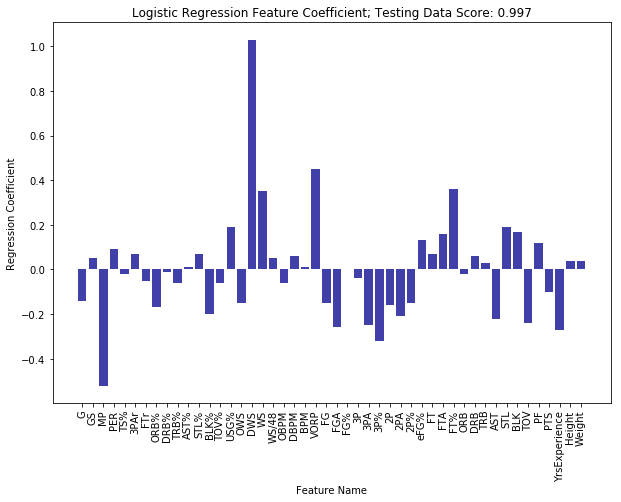

In [130]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Logistic Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("DPOY_Regression_Features")
plt.show()

In [131]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
1095       0           1
65         1           0
2385       1           0

In [132]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

Actual  Prediction
2053       1           1
65         1           0
2385       1           0

In [133]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

Actual  Prediction
2053       1           1
1095       0           1

In [134]:
predictions.shape

(1195,)

In [135]:
data.iloc[1183]

G                  2.000
GS                 0.000
MP                 9.000
PER               15.700
TS%                0.425
3PAr               0.200
FTr                0.400
ORB%               0.000
DRB%              25.200
TRB%              12.200
AST%               0.000
STL%               0.000
BLK%               8.100
TOV%               0.000
USG%              28.400
OWS                0.000
DWS                0.000
WS                 0.000
WS/48             -0.010
OBPM              -9.900
DBPM              -4.900
BPM              -14.900
VORP               0.000
FG                 2.000
FGA                5.000
FG%                0.400
3P                 0.000
3PA                1.000
3P%                0.000
2P                 2.000
2PA                4.000
2P%                0.500
eFG%               0.400
FT                 1.000
FTA                2.000
FT%                0.500
ORB                0.000
DRB                2.000
TRB                2.000
AST                0.000


In [136]:
from sklearn import tree

In [137]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [138]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99665271966527191

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99832635983263596

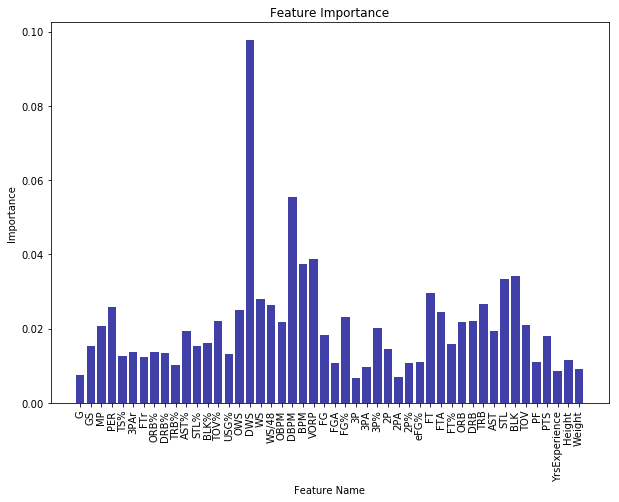

In [140]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("DPOY_Features")
plt.show()

In [141]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.0976105514329451, 'DWS'),
 (0.055513992331687599, 'DBPM'),
 (0.038619613509347117, 'VORP'),
 (0.037351400955232664, 'BPM'),
 (0.034214313199491829, 'BLK'),
 (0.033389317550250708, 'STL'),
 (0.029602301685832999, 'FT'),
 (0.027988726267759542, 'WS'),
 (0.026731631208243817, 'TRB'),
 (0.026344563320839457, 'WS/48'),
 (0.025899803522807022, 'PER'),
 (0.024899671392410241, 'OWS'),
 (0.024441547510011052, 'FTA'),
 (0.023194419328688952, 'FG%'),
 (0.022093274485147987, 'DRB'),
 (0.021902851209482023, 'TOV%'),
 (0.021880015502027977, 'OBPM'),
 (0.021738712261795853, 'ORB'),
 (0.021028120552521758, 'TOV'),
 (0.020592361405037184, 'MP'),
 (0.020077962713275829, '3P%'),
 (0.019314797199311614, 'AST'),
 (0.019305442235338546, 'AST%'),
 (0.018150967890584208, 'FG'),
 (0.018105071407184304, 'PTS'),
 (0.016198062915838484, 'BLK%'),
 (0.015749879143159361, 'FT%'),
 (0.015432087019230689, 'GS'),
 (0.015303476415411021, 'STL%'),
 (0.014605121122512277, '2P'),
 (0.013652572665466729, 'ORB%'),
 (0.01

In [142]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
65         1           0
2053       1           0

In [143]:
df.iloc[2053]

Year                        2011
Player             Dwight Howard
Pos                            C
Age                           25
Tm                           ORL
G                             78
GS                            78
MP                          2935
PER                         26.1
TS%                        0.616
3PAr                       0.007
FTr                        0.877
ORB%                        12.6
DRB%                        30.6
TRB%                        21.8
AST%                         6.8
STL%                         1.9
BLK%                         4.9
TOV%                        16.2
USG%                        27.2
OWS                          6.7
DWS                          7.7
WS                          14.4
WS/48                      0.235
OBPM                         0.9
DBPM                         3.9
BPM                          4.8
VORP                           5
FG                           619
FGA                         1044
FG%       

In [144]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

Actual  Prediction
65         1           0
2053       1           0

In [145]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

Empty DataFrame
Columns: [Actual, Prediction]
Index: []

In [146]:
predict_df.shape

(1195, 2)

# Combining DPOY, 6th Man, ROY, and MVP Data

In [147]:
season_stats = pd.read_csv('cleaned_data.csv')

In [148]:
dpoy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Joakim Noah')]
dpoy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Marc Gasol')]
dpoy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Tyson Chandler')]
dpoy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Garnett')]
dpoy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Marcus Camby')]

dpoys = [dpoy_2007, dpoy_2008, dpoy_2009, dpoy_2010, dpoy_2011, dpoy_2012, dpoy_2013, dpoy_2014, dpoy_2015, dpoy_2016]

dpoys_df = pd.concat(dpoys)
#dpoys_df

In [149]:
sixman_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Lou Williams')]
sixman_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'J.R. Smith')]
sixman_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'James Harden')]
sixman_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Lamar Odom')]
sixman_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Jason Terry')]
sixman_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Manu Ginobili')]
sixman_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Leandro Barbosa')]

sixmen = [sixman_2007, sixman_2008, sixman_2009, sixman_2010, sixman_2011, sixman_2012, sixman_2013, sixman_2014, sixman_2015, sixman_2016]

sixmen_df = pd.concat(sixmen)

In [150]:
roy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Karl-Anthony Towns')]
roy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Andrew Wiggins')]
roy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Michael Carter-Williams')]
roy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Damian Lillard')]
roy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Kyrie Irving')]
roy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Blake Griffin')]
roy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Tyreke Evans')]
roy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Derrick Rose')]
roy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Durant')]
roy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Brandon Roy')]

rookies = [roy_2007, roy_2008, roy_2009, roy_2010, roy_2011, roy_2012, roy_2013, roy_2014, roy_2015, roy_2016]

rookies_df = pd.concat(rookies)

In [151]:
mvp_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Kevin Durant')]
mvp_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Derrick Rose')]
mvp_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kobe Bryant')]
mvp_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Dirk Nowitzki')]

mvps = [mvp_2007, mvp_2008, mvp_2009, mvp_2010, mvp_2011, mvp_2012, mvp_2013, mvp_2014, mvp_2015, mvp_2016]

mvps_df = pd.concat(mvps)

In [152]:
df = season_stats

In [153]:
dpoys_index = dpoys_df.index.values.tolist()
dpoys_index

[77, 696, 1360, 1938, 2565, 2987, 3623, 4442, 4978, 5604]

In [154]:
sixmen_index = sixmen_df.index.values.tolist()
sixmen_index

[25, 708, 1626, 1809, 2703, 3107, 3920, 4157, 5256, 5391]

In [155]:
rookies_index = rookies_df.index.values.tolist()
rookies_index

[413, 667, 1565, 1850, 2529, 3156, 3763, 4136, 5249, 5805]

In [156]:
mvps_index = mvps_df.index.values.tolist()
mvps_index

[343, 598, 1383, 1978, 2761, 3164, 3701, 4205, 4766, 5398]

In [157]:
dpoy = []
for i in range(0, len(df)):
    if i in dpoys_index:
        value = 1
        dpoy.append(value)
    else:
        value = 0
        dpoy.append(value)

In [158]:
sixmen = []
for i in range(0, len(df)):
    if i in sixmen_index:
        value = 1
        sixmen.append(value)
    else:
        value = 0
        sixmen.append(value)

In [159]:
rookies = []
for i in range(0, len(df)):
    if i in rookies_index:
        value = 1
        rookies.append(value)
    else:
        value = 0
        rookies.append(value)

In [160]:
mvps = []
for i in range(0, len(df)):
    if i in mvps_index:
        value = 1
        mvps.append(value)
    else:
        value = 0
        mvps.append(value)

In [161]:
len(dpoy)

5860

In [162]:
len(sixmen)

5860

In [163]:
len(rookies)

5860

In [164]:
len(mvps)

5860

In [165]:
sum = 0
for i in range(0, len(dpoy)):
    sum = sum + dpoy[i]
print(sum)

10


In [166]:
sum = 0
for i in range(0, len(sixmen)):
    sum = sum + sixmen[i]
print(sum)

10


In [167]:
sum = 0
for i in range(0, len(rookies)):
    sum = sum + rookies[i]
print(sum)

10


In [168]:
sum = 0
for i in range(0, len(mvps)):
    sum = sum + mvps[i]
print(sum)

10


In [169]:
df['dpoy'] = dpoy
df['sixmen'] = sixmen
df['rookies'] = rookies
df['mvps'] = mvps

In [170]:
df.shape

(5860, 61)

In [171]:
df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'dpoy', 'sixmen', 'rookies', 'mvps'],
      dtype='object')

# Logistic Regression/Random Forests 6th Man

In [172]:
sixmen_df = df[np.isfinite(df['WS/48'])]
sixmen_df = sixmen_df[np.isfinite(sixmen_df['FG%'])]
sixmen_df = sixmen_df[np.isfinite(sixmen_df['YrsExperience'])]
sixmen_df = sixmen_df.drop("blanl", axis=1)
sixmen_df = sixmen_df.drop("blank2", axis=1)
sixmen_df = sixmen_df.dropna(axis=0, how='any')
sixmen_df = sixmen_df.reset_index(drop=True) #RESET INDEX
data = sixmen_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("sixmen", axis=1)
feature_names = data.columns
target = sixmen_df['sixmen']
#target_names = target.value_counts().keys().tolist()
#data.head()

In [173]:
data.shape

(4780, 51)

In [174]:
target.shape

(4780,)

In [175]:
#target = target.values.reshape(-1,1)

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [177]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [178]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [179]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [181]:
coefficients = classifier.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = data.columns.tolist()
print(dict(zip(features, coefficients)))

{'G': '-0.11', 'GS': '-1.46', 'MP': '0.25', 'PER': '0.25', 'TS%': '-0.14', '3PAr': '-0.31', 'FTr': '0.08', 'ORB%': '0.02', 'DRB%': '-0.12', 'TRB%': '-0.15', 'AST%': '-0.15', 'STL%': '-0.04', 'BLK%': '-0.02', 'TOV%': '0.12', 'USG%': '0.13', 'OWS': '0.02', 'DWS': '0.33', 'WS': '0.16', 'WS/48': '0.06', 'OBPM': '-0.07', 'DBPM': '0.05', 'BPM': '0.01', 'VORP': '-0.01', 'FG': '0.15', 'FGA': '0.27', 'FG%': '0.05', '3P': '0.35', '3PA': '0.63', '3P%': '-0.16', '2P': '0.06', '2PA': '0.07', '2P%': '0.08', 'eFG%': '-0.18', 'FT': '0.22', 'FTA': '0.08', 'FT%': '0.02', 'ORB': '0.11', 'DRB': '-0.30', 'TRB': '-0.19', 'AST': '-0.20', 'STL': '0.06', 'BLK': '-0.01', 'TOV': '-0.35', 'PF': '-0.24', 'PTS': '0.19', 'YrsExperience': '0.42', 'Height': '0.00', 'Weight': '-0.07', 'dpoy': '-0.02', 'rookies': '0.05', 'mvps': '-0.18'}


In [182]:
score = classifier.score(X_test_scaled, y_test)
score = "%.3f" % score
score

'0.997'

In [183]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


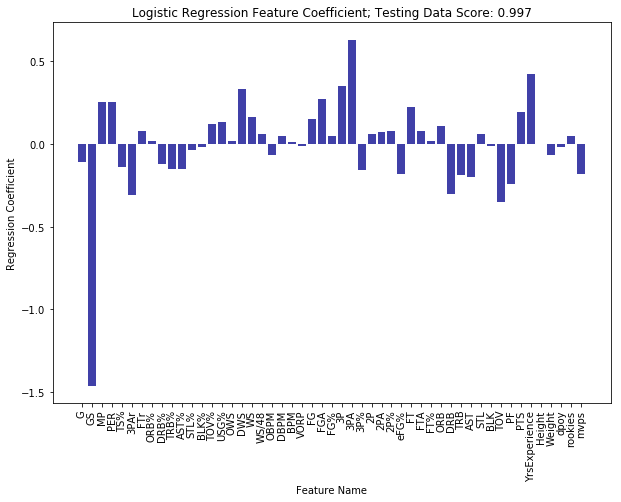

In [184]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Logistic Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("6Man_Regression_Features")
plt.show()

In [185]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
2162       1           0
19         1           0
2484       1           0

In [186]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

Actual  Prediction
2162       1           0
19         1           0
2484       1           0

In [187]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

Empty DataFrame
Columns: [Actual, Prediction]
Index: []

In [188]:
from sklearn import tree

In [189]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [190]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99665271966527191

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99748953974895394

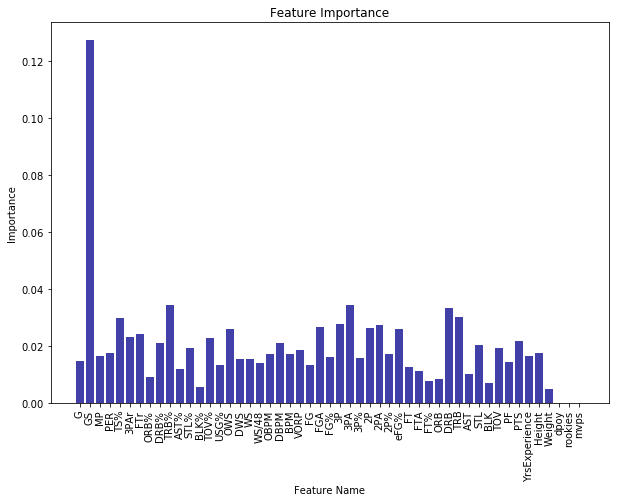

In [192]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("6Man_Features")
plt.show()

In [193]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12712780258358777, 'GS'),
 (0.0343318832569608, 'TRB%'),
 (0.034329040035895708, '3PA'),
 (0.033429237126850954, 'DRB'),
 (0.030008990582951429, 'TRB'),
 (0.029918487215967828, 'TS%'),
 (0.027669651698473387, '3P'),
 (0.027394949155938673, '2PA'),
 (0.026564403258714418, 'FGA'),
 (0.02640675639974762, '2P'),
 (0.025991939306045805, 'OWS'),
 (0.025948049892511257, 'eFG%'),
 (0.023985467031764181, 'FTr'),
 (0.023074994091794494, '3PAr'),
 (0.022905851753422839, 'TOV%'),
 (0.021762534511481621, 'PTS'),
 (0.021117686013728688, 'DRB%'),
 (0.020912505055375709, 'DBPM'),
 (0.020146507320672819, 'STL'),
 (0.019197379428746875, 'TOV'),
 (0.019062329454502355, 'STL%'),
 (0.018383880907595854, 'VORP'),
 (0.017551026506274055, 'PER'),
 (0.017415126874564174, 'Height'),
 (0.01725859485928459, 'BPM'),
 (0.017217857119277018, 'OBPM'),
 (0.017184758986578636, '2P%'),
 (0.016545094714848094, 'MP'),
 (0.016410224922467402, 'YrsExperience'),
 (0.01621362875599042, 'FG%'),
 (0.015817104787319295, '3P%

In [194]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
4369       1           0
19         1           0
3333       1           0

# Logistic Regression/Random Forests Rookie of the Year

In [195]:
rookies_df = df[np.isfinite(df['WS/48'])]
rookies_df = rookies_df[np.isfinite(rookies_df['FG%'])]
rookies_df = rookies_df[np.isfinite(rookies_df['YrsExperience'])]
rookies_df = rookies_df.drop("blanl", axis=1)
rookies_df = rookies_df.drop("blank2", axis=1)
rookies_df = rookies_df.dropna(axis=0, how='any')
rookies_df = rookies_df.reset_index(drop=True) #RESET INDEX
data = rookies_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("rookies", axis=1)
feature_names = data.columns
target = sixmen_df['rookies']
#target_names = target.value_counts().keys().tolist()
#data.head()

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [197]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [198]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [199]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [200]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
coefficients = classifier.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = data.columns.tolist()
print(dict(zip(features, coefficients)))

{'G': '-0.17', 'GS': '0.23', 'MP': '0.11', 'PER': '-0.29', 'TS%': '0.07', '3PAr': '0.24', 'FTr': '-0.01', 'ORB%': '0.04', 'DRB%': '0.01', 'TRB%': '0.10', 'AST%': '0.02', 'STL%': '0.01', 'BLK%': '0.06', 'TOV%': '-0.08', 'USG%': '-0.27', 'OWS': '-0.22', 'DWS': '-0.90', 'WS': '-0.50', 'WS/48': '-0.04', 'OBPM': '-0.01', 'DBPM': '0.18', 'BPM': '0.07', 'VORP': '0.19', 'FG': '0.29', 'FGA': '0.28', 'FG%': '-0.02', '3P': '-0.36', '3PA': '0.16', '3P%': '-0.00', '2P': '0.45', '2PA': '0.28', '2P%': '0.05', 'eFG%': '0.03', 'FT': '0.10', 'FTA': '0.04', 'FT%': '0.07', 'ORB': '-0.05', 'DRB': '0.12', 'TRB': '0.07', 'AST': '0.39', 'STL': '-0.20', 'BLK': '0.28', 'TOV': '0.37', 'PF': '-0.54', 'PTS': '0.20', 'YrsExperience': '-0.93', 'Height': '0.37', 'Weight': '-0.02', 'dpoy': '0.02', 'sixmen': '0.05', 'mvps': '-0.04'}


In [202]:
score = classifier.score(X_test_scaled, y_test)
score = "%.3f" % score
score

'0.997'

In [203]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


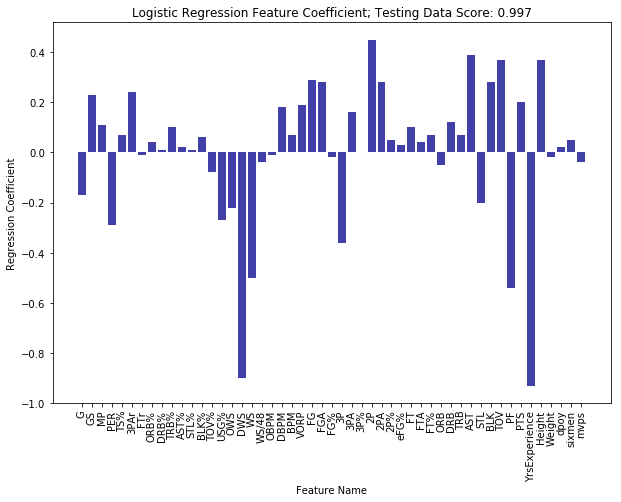

In [204]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Logistic Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("ROY_Regression_Features")
plt.show()

In [205]:
from sklearn import tree

In [206]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [207]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99665271966527191

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99832635983263596

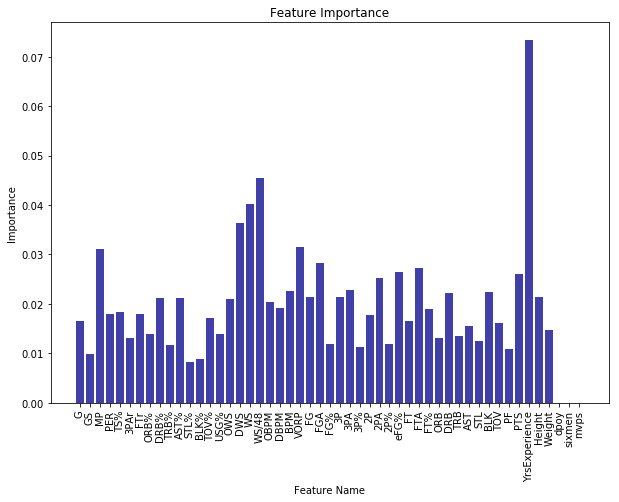

In [209]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("ROY_Features")
plt.show()

In [210]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.073282726684337773, 'YrsExperience'),
 (0.045383350164055994, 'WS/48'),
 (0.040215534648625012, 'WS'),
 (0.036319633669113345, 'DWS'),
 (0.031439427539254654, 'VORP'),
 (0.031171517418024989, 'MP'),
 (0.028368296041786388, 'FGA'),
 (0.02723716057082327, 'FTA'),
 (0.026511904928694568, 'eFG%'),
 (0.026116047206078727, 'PTS'),
 (0.025252323849209127, '2PA'),
 (0.022765438555658747, '3PA'),
 (0.022619313466408598, 'BPM'),
 (0.022332983341451836, 'BLK'),
 (0.022237013821337758, 'DRB'),
 (0.021423392885645237, '3P'),
 (0.021354445619412736, 'FG'),
 (0.021310544986352625, 'Height'),
 (0.021238398819855647, 'DRB%'),
 (0.021168030174966129, 'AST%'),
 (0.021017667700187127, 'OWS'),
 (0.020393246551298247, 'OBPM'),
 (0.019148841843179804, 'DBPM'),
 (0.019058425249137988, 'FT%'),
 (0.018397385864631032, 'TS%'),
 (0.018026290239679419, 'FTr'),
 (0.01795896935237529, 'PER'),
 (0.017656660644458578, '2P'),
 (0.017157979542501908, 'TOV%'),
 (0.016544583093250412, 'FT'),
 (0.016495361707210644, 'G

In [211]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
2020       1           0
1240       1           0

In [212]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

Actual  Prediction
2020       1           0
1240       1           0

# Logistic Regression/Random Forests MVP

In [213]:
mvp_df = df[np.isfinite(df['WS/48'])]
mvp_df = mvp_df[np.isfinite(mvp_df['FG%'])]
mvp_df = mvp_df[np.isfinite(mvp_df['YrsExperience'])]
mvp_df = mvp_df.drop("blanl", axis=1)
mvp_df = mvp_df.drop("blank2", axis=1)
mvp_df = mvp_df.dropna(axis=0, how='any')
mvp_df = mvp_df.reset_index(drop=True) #RESET INDEX
data = mvp_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("mvps", axis=1)
feature_names = data.columns
target = sixmen_df['mvps']

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [215]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [216]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [217]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
coefficients = classifier.coef_.tolist()[0]
coefficients = [ '%.2f' % elem for elem in coefficients ]
features = data.columns.tolist()
print(dict(zip(features, coefficients)))

{'G': '0.10', 'GS': '-0.32', 'MP': '-0.57', 'PER': '-0.05', 'TS%': '-0.14', '3PAr': '-0.14', 'FTr': '-0.11', 'ORB%': '0.01', 'DRB%': '-0.01', 'TRB%': '0.09', 'AST%': '-0.08', 'STL%': '0.03', 'BLK%': '-0.01', 'TOV%': '0.13', 'USG%': '0.04', 'OWS': '0.28', 'DWS': '0.10', 'WS': '0.28', 'WS/48': '0.02', 'OBPM': '-0.05', 'DBPM': '-0.01', 'BPM': '-0.04', 'VORP': '0.66', 'FG': '0.24', 'FGA': '-0.07', 'FG%': '0.09', '3P': '0.37', '3PA': '-0.01', '3P%': '-0.05', '2P': '0.15', '2PA': '-0.08', '2P%': '0.01', 'eFG%': '0.04', 'FT': '-0.03', 'FTA': '0.04', 'FT%': '-0.06', 'ORB': '-0.16', 'DRB': '-0.05', 'TRB': '-0.08', 'AST': '-0.22', 'STL': '0.09', 'BLK': '-0.14', 'TOV': '-0.13', 'PF': '-0.23', 'PTS': '0.21', 'YrsExperience': '0.12', 'Height': '-0.02', 'Weight': '-0.13', 'dpoy': '-0.11', 'sixmen': '-0.10', 'rookies': '0.03'}


In [220]:
score = classifier.score(X_test_scaled, y_test)
score = "%.3f" % score
score

'0.997'

In [221]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


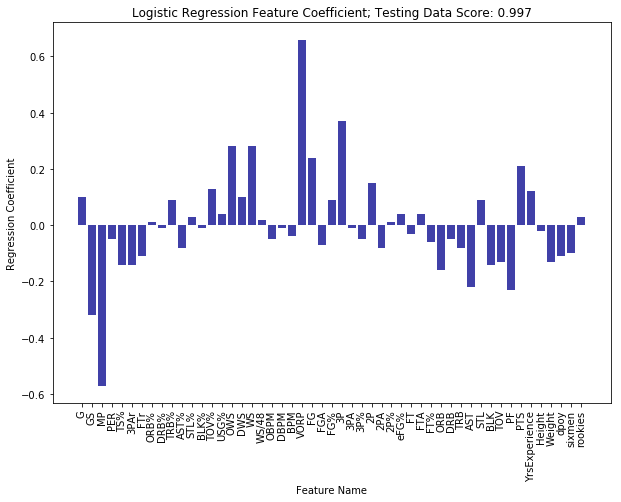

In [222]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Logistic Regression Feature Coefficient; Testing Data Score: "f"{score}")
plt.xlabel("Feature Name")
plt.ylabel("Regression Coefficient")

plt.bar(x_values, coefficients, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("MVP_Regression_Features")
plt.show()

In [223]:
from sklearn import tree

In [224]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [225]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99916317991631798

In [226]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99916317991631798

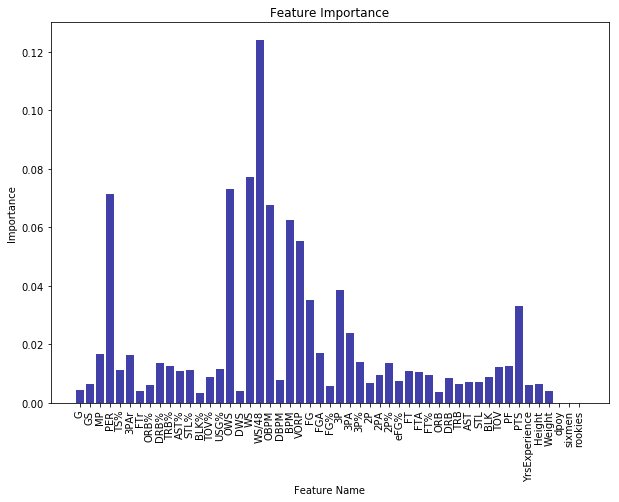

In [227]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("MVP_Features")
plt.show()

In [228]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12395607775559737, 'WS/48'),
 (0.077203658211297682, 'WS'),
 (0.073231566573568663, 'OWS'),
 (0.071376756583121481, 'PER'),
 (0.067804012730668217, 'OBPM'),
 (0.06257513492902661, 'BPM'),
 (0.055377096095250156, 'VORP'),
 (0.038485470155836969, '3P'),
 (0.03504630826706507, 'FG'),
 (0.033102968947496689, 'PTS'),
 (0.023921542993210893, '3PA'),
 (0.016892110024576211, 'FGA'),
 (0.016828209592346134, 'MP'),
 (0.016423389545867643, '3PAr'),
 (0.014121991370903557, '3P%'),
 (0.013611471109568557, '2P%'),
 (0.013586297505733005, 'DRB%'),
 (0.012748515833402139, 'TRB%'),
 (0.01262423308618643, 'PF'),
 (0.012361854819595288, 'TOV'),
 (0.011416507423052275, 'USG%'),
 (0.011248663276777879, 'STL%'),
 (0.011137639030767041, 'TS%'),
 (0.011028027002000678, 'FT'),
 (0.010877546023642493, 'AST%'),
 (0.01064029947881139, 'FTA'),
 (0.0095979962701291197, 'FT%'),
 (0.0094950414628918092, '2PA'),
 (0.0087956855588214727, 'BLK'),
 (0.0086823653672019347, 'TOV%'),
 (0.0086342564660250934, 'DRB'),
 (0

In [229]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

Actual  Prediction
2206       1           0

In [230]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

Actual  Prediction
2206       1           0
1095       1           1

In [231]:
mvp_df.iloc[2206]

Year                       2011
Player             Derrick Rose
Pos                          PG
Age                          22
Tm                          CHI
G                            81
GS                           81
MP                         3026
PER                        23.5
TS%                        0.55
3PAr                      0.241
FTr                       0.348
ORB%                        3.2
DRB%                        9.4
TRB%                        6.4
AST%                       38.7
STL%                        1.5
BLK%                        1.3
TOV%                       13.1
USG%                       32.2
OWS                         8.3
DWS                         4.8
WS                         13.1
WS/48                     0.208
OBPM                        5.8
DBPM                        0.1
BPM                         5.9
VORP                          6
FG                          711
FGA                        1597
FG%                       0.445
3P      